In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/seerNew.csv')

In [18]:
sorted(df.columns)

['adjusted_ajcc_6th_m',
 'adjusted_ajcc_6th_n',
 'adjusted_ajcc_6th_stage',
 'adjusted_ajcc_6th_t',
 'age_at_diagnosis',
 'chemotherapy_status',
 'cod_to_site',
 'death_classification',
 'diagnosis_to_treatment_days',
 'er_status',
 'follow_up_year',
 'laterality',
 'marital_status_at_diagnosis',
 'pr_status',
 'race',
 'reporting_source',
 'sex',
 'site_recode',
 'survival_months',
 'tumor_site',
 'vital_status',
 'year_of_death',
 'year_of_diagnosis']

In [4]:
df = df.rename(columns = {
    'Chemotherapy recode (yes, no/unk)' : 'chemotherapy_status',
    'ER Status Recode Breast Cancer (1990+)' : 'er_status',
    'PR Status Recode Breast Cancer (1990+)' : 'pr_status',
    'Primary Site - labeled' : 'tumor_site',
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)' : 'race',
    'Year of follow-up recode' : 'follow_up_year',
    'Year of death recode' : 'year_of_death',
    'Vital status recode (study cutoff used)' : 'vital_status',
    'Time from diagnosis to treatment in days recode' : 'diagnosis_to_treatment_days',
    'Survival months' : 'survival_months',
    'SEER cause-specific death classification' : 'death_classification',
    'Marital status at diagnosis' : 'marital_status_at_diagnosis',
    'Year of diagnosis' : 'year_of_diagnosis',
    'Site recode ICD-O-3/WHO 2008': 'site_recode',
    'Type of Reporting Source' : 'reporting_source',
    'COD to site recode' : 'cod_to_site',
    'Laterality' : 'laterality',
    'Age recode with single ages and 85+' : 'age_at_diagnosis',
    'Breast - Adjusted AJCC 6th M (1988-2015)' : 'adjusted_ajcc_6th_m',
    'Breast - Adjusted AJCC 6th N (1988-2015)' : 'adjusted_ajcc_6th_n',
    'Breast - Adjusted AJCC 6th Stage (1988-2015)' : 'adjusted_ajcc_6th_stage',
    'Breast - Adjusted AJCC 6th T (1988-2015)' : 'adjusted_ajcc_6th_t',
    'Sex' : 'sex'
})

In [5]:
laterality_map = {
    'Left - origin of primary': 'left',
    'Right - origin of primary': 'right',
    'Bilateral, single primary': 'bilateral',
    'Only one side - side unspecified': 'unknown',
    'Paired site, but no information concerning laterality': 'unknown',
}
df.laterality = df.laterality.map(laterality_map)
df.laterality.value_counts()

laterality
left         352690
right        340063
unknown        7588
bilateral       822
Name: count, dtype: int64

In [6]:
df.tumor_site = df.tumor_site.str[6:].str.replace(' of breast', '')

In [7]:
df['vital_status'].value_counts()

vital_status
Dead     356449
Alive    344714
Name: count, dtype: int64

In [8]:
# Replace "Unknown" with NaN
df['survival_months'] = pd.to_numeric(df['survival_months'], errors='coerce')

# Check how many were replaced
missing_count = df['survival_months'].isnull().sum()
print(f"Number of missing survival months after replacement: {missing_count}")

Number of missing survival months after replacement: 3398


In [9]:
df['survival_months'].value_counts()

survival_months
0.0      7504
1.0      5462
2.0      5056
6.0      4723
4.0      4641
         ... 
553.0      19
551.0      18
560.0      18
556.0      15
562.0      11
Name: count, Length: 564, dtype: int64

In [10]:
df['survival_months'].unique()

array([162.,  28.,  84.,  14., 192.,  37.,  26., 175., 267.,  12.,  47.,
        20., 116., 329.,  81., 218.,   7.,  58., 208., 248.,  89., 153.,
        48.,  95., 187., 370.,  72.,  61.,  92.,  67.,  50., 130., 111.,
       398., 125., 255.,  93., 121.,  60., 168., 269., 449., 126., 297.,
       194.,  75., 206., 115., 239., 101.,  29.,  23.,  10., 249., 371.,
       343.,  98., 216., 196., 238., 215.,  96., 315., 113., 137.,   9.,
       377.,  18., 376.,  35.,  54.,  17.,  78., 118.,  62., 143., 184.,
       169., 158., 225., 322.,  24., 132., 444.,  21.,  15., 381., 131.,
       364., 163.,  59., 154.,  63., 177.,  71., 347., 229., 473., 141.,
        25., 133., 180.,  70.,  13., 100., 228., 181.,  91.,  30.,  76.,
        42., 199., 365., 171.,  56., 114., 443., 244., 150.,  38., 185.,
       106., 159.,  77.,  49.,  69.,  22., 226.,   0., 361., 324.,  45.,
       333., 160., 335., 308., 231., 128.,  80., 408., 205., 120., 123.,
        51., 394., 152., 170., 342., 272., 136., 14

In [11]:
# Count missing (NaN) values
missing_count = df['survival_months'].isnull().sum()
missing_count

3398

In [12]:
# Get unique values in survival_months (excluding NaN)
data = df.dropna(subset=['survival_months'])

In [13]:
missing_count = data['survival_months'].isnull().sum()
missing_count

0

Rows after removing missing survival_months: 697765


C:\Users\Sash\AppData\Local\Temp\ipykernel_8424\4170857453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['survival_months'] = data['survival_months'].astype(int)


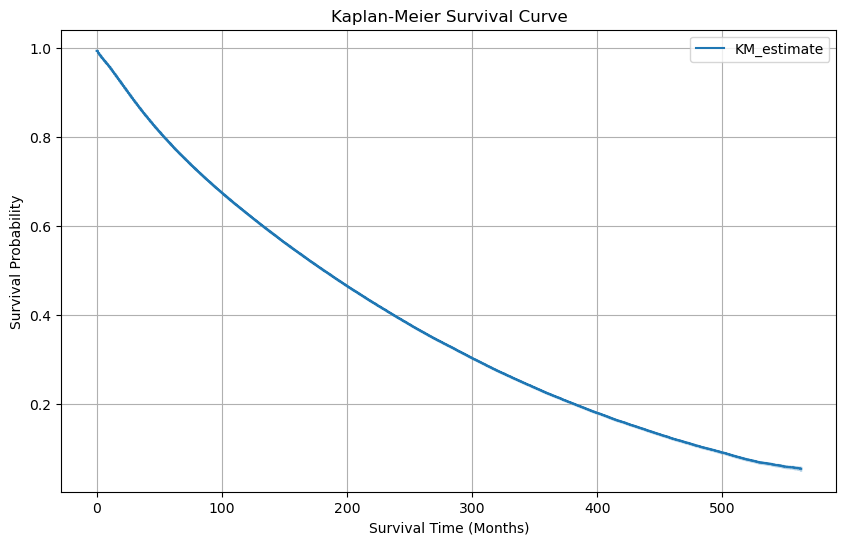

In [14]:
print(f"Rows after removing missing survival_months: {len(data)}")

# Ensure 'survival_months' is integer type
data['survival_months'] = data['survival_months'].astype(int)

# Proceed with Kaplan-Meier analysis using the cleaned data
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(data['survival_months'], event_observed=(data['vital_status'] == 'Dead'))

# Plot survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

In [15]:
data.vital_status.unique()

array(['Dead', 'Alive'], dtype=object)

In [19]:
data.pr_status.unique()

array(['Recode not available', 'Negative', 'Positive',
       'Borderline/Unknown'], dtype=object)

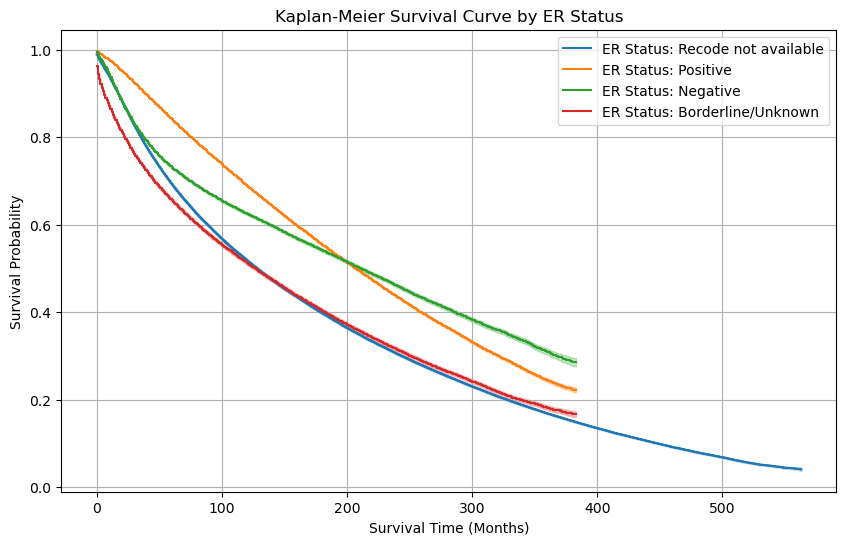

In [16]:
# Plot Kaplan-Meier curve for ER Status
plt.figure(figsize=(10, 6))
for er_status in data['er_status'].unique():
    kmf.fit(data[data['er_status'] == er_status]['survival_months'], 
            event_observed=(data[data['er_status'] == er_status]['vital_status'] == 'Dead'))  # 1 = Dead
    kmf.plot_survival_function(label=f'ER Status: {er_status}')
plt.title('Kaplan-Meier Survival Curve by ER Status')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

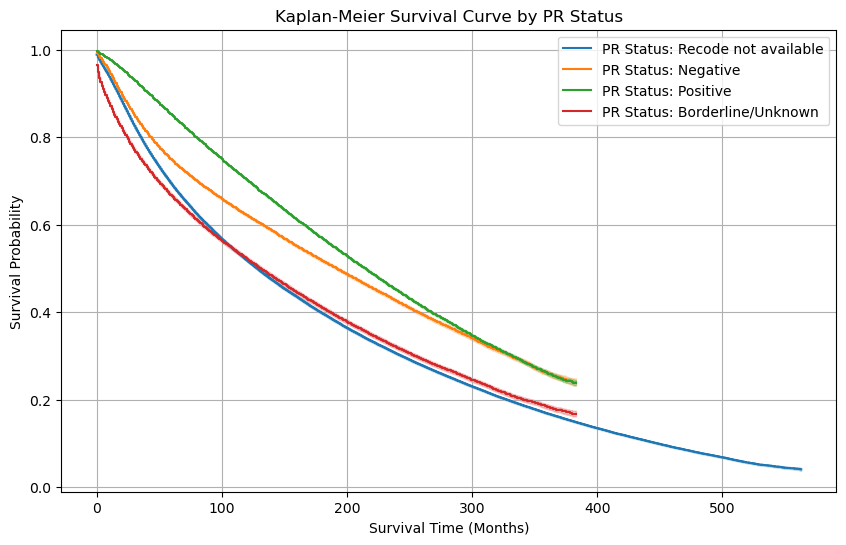

In [21]:
# Plot Kaplan-Meier curve for PR Status
plt.figure(figsize=(10, 6))
for pr_status in data['pr_status'].unique():
    kmf.fit(data[data['pr_status'] == pr_status]['survival_months'], 
            event_observed=(data[data['pr_status'] == pr_status]['vital_status'] == 'Dead'))  # 1 = Dead
    kmf.plot_survival_function(label=f'PR Status: {pr_status}')
plt.title('Kaplan-Meier Survival Curve by PR Status')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

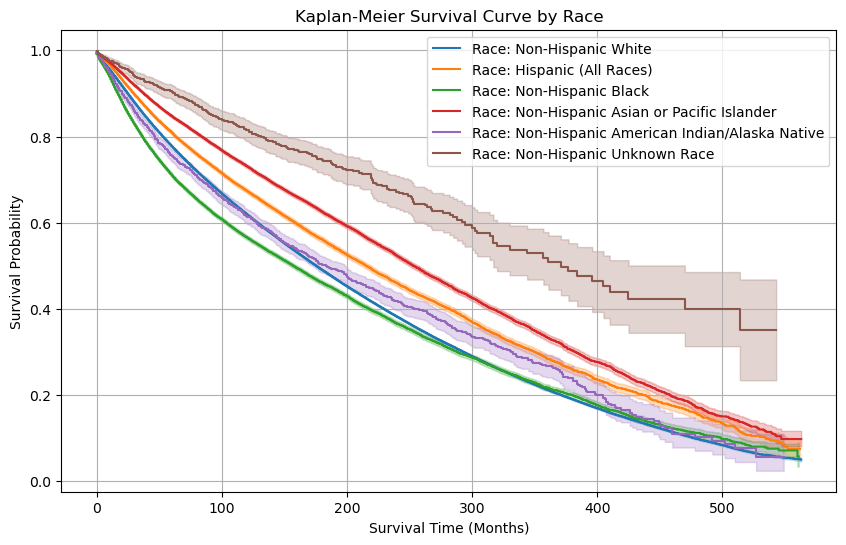

In [26]:
# Plot Kaplan-Meier curve for Race
plt.figure(figsize=(10, 6))
for race in data['race'].unique():
    kmf.fit(data[data['race'] == race]['survival_months'], 
            event_observed=(data[data['race'] == race]['vital_status'] == 'Dead'))  # 1 = Dead
    kmf.plot_survival_function(label=f'Race: {race}')
plt.title('Kaplan-Meier Survival Curve by Race')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
data.race.unique()

array(['Non-Hispanic White', 'Hispanic (All Races)', 'Non-Hispanic Black',
       'Non-Hispanic Asian or Pacific Islander',
       'Non-Hispanic American Indian/Alaska Native',
       'Non-Hispanic Unknown Race'], dtype=object)

In [32]:
data.vital_status.unique()

array(['Dead', 'Alive'], dtype=object)

In [25]:
data.race.value_counts()

race
Non-Hispanic White                            540965
Non-Hispanic Asian or Pacific Islander         58895
Non-Hispanic Black                             49232
Hispanic (All Races)                           42650
Non-Hispanic American Indian/Alaska Native      4225
Non-Hispanic Unknown Race                       1798
Name: count, dtype: int64

In [33]:
data.age_at_diagnosis.unique()

array([64, 82, 60, 79, 52, 38, 57, 61, 70, 62, 74, 67, 63, 41, 55, 84, 58,
       54, 36, 35, 44, 42, 66, 56, 27, 46, 80, 59, 43, 37, 33, 45, 85, 71,
       48, 34, 53, 65, 75, 83, 76, 72, 30, 39, 40, 51, 49, 68, 78, 77, 32,
       50, 73, 47, 69, 31, 29, 26, 28, 24, 81, 22, 25, 21, 23, 18, 11, 20,
       19, 17, 15, 14, 13, 16,  2, 12,  8], dtype=int64)

In [ ]:
# Replace "85+ years" with a value of 85 (or a higher value, say 100 for ages 80+)
data['age_at_diagnosis'] = data['age_at_diagnosis'].replace('85+ years', '85 years')

# Clean the 'age_at_diagnosis' column by extracting numeric values
data['age_at_diagnosis'] = data['age_at_diagnosis'].str.extract('(\d+)')  # Extract numeric part
data['age_at_diagnosis'] = pd.to_numeric(data['age_at_diagnosis'], errors='coerce')  # Convert to numeric

# Drop rows with NaN values in 'age_at_diagnosis' or 'survival_months'
data_cleaned = data.dropna(subset=['age_at_diagnosis', 'survival_months'])

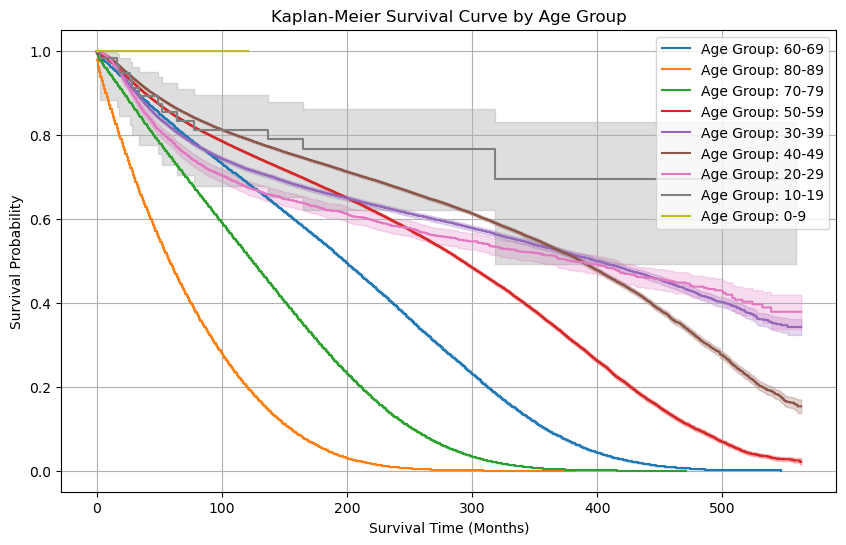

In [35]:
age_bins = list(range(0, 101, 10))  # Bins from 0 to 100 with a step of 10
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]  # Create labels like '0-9', '10-19', ..., '90-99'

data_cleaned['age_group'] = pd.cut(data_cleaned['age_at_diagnosis'], bins=age_bins, labels=age_labels, right=False)

# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plot Kaplan-Meier curve for Age Groups
plt.figure(figsize=(10, 6))
for age_group in data_cleaned['age_group'].unique():
    kmf.fit(data_cleaned[data_cleaned['age_group'] == age_group]['survival_months'], 
            event_observed=(data_cleaned[data_cleaned['age_group'] == age_group]['vital_status'] == 'Dead'))  # 'Dead' is the event
    kmf.plot_survival_function(label=f'Age Group: {age_group}')

plt.title('Kaplan-Meier Survival Curve by Age Group')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
data.sex.unique()

array(['Female', 'Male'], dtype=object)

In [37]:
data.sex.value_counts()

sex
Female    692928
Male        4837
Name: count, dtype: int64

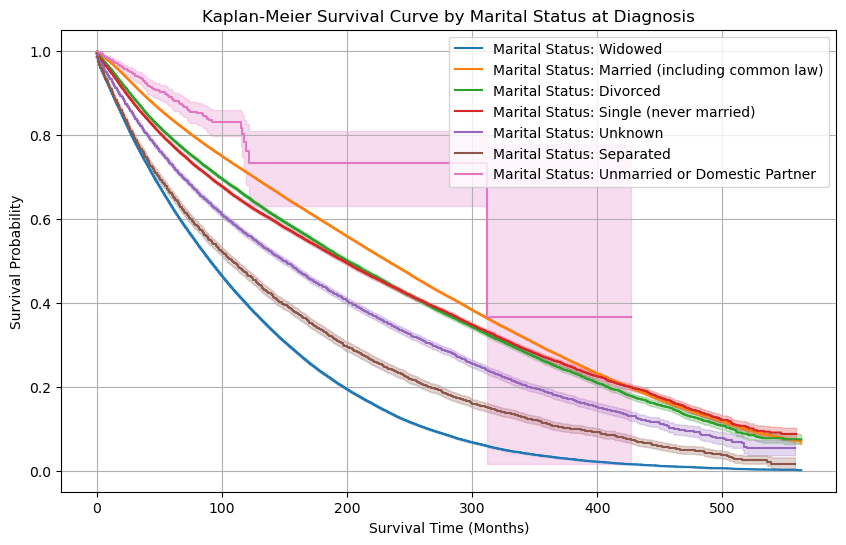

In [38]:
plt.figure(figsize=(10, 6))
for marital_status in data['marital_status_at_diagnosis'].unique():
    kmf.fit(data[data['marital_status_at_diagnosis'] == marital_status]['survival_months'],
            event_observed=(data[data['marital_status_at_diagnosis'] == marital_status]['vital_status'] == 'Dead'))  # 'Dead' is the event
    kmf.plot_survival_function(label=f'Marital Status: {marital_status}')

plt.title('Kaplan-Meier Survival Curve by Marital Status at Diagnosis')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

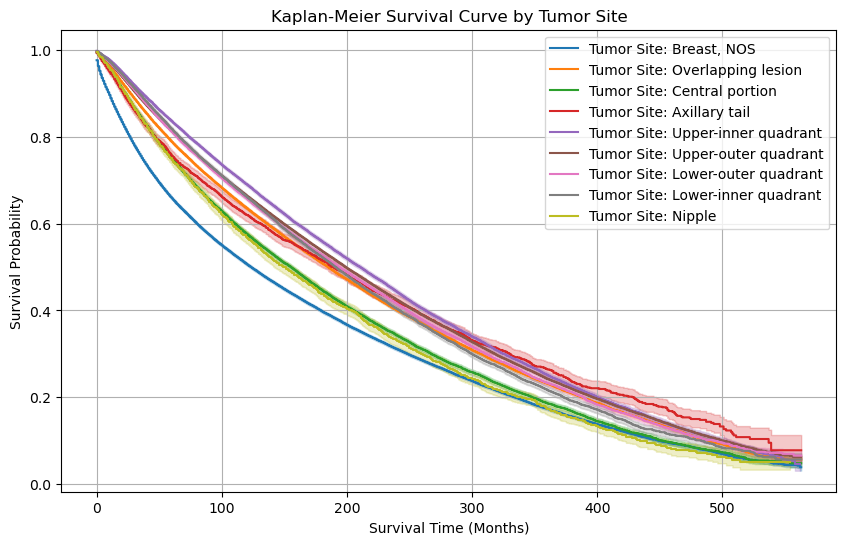

In [40]:
# Plot Kaplan-Meier curve for Tumor Site
plt.figure(figsize=(10, 6))
for tumor_site in data['tumor_site'].unique():
    kmf.fit(data[data['tumor_site'] == tumor_site]['survival_months'],
            event_observed=(data[data['tumor_site'] == tumor_site]['vital_status'] == 'Dead'))  # 'Dead' is the event
    kmf.plot_survival_function(label=f'Tumor Site: {tumor_site}')

plt.title('Kaplan-Meier Survival Curve by Tumor Site')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

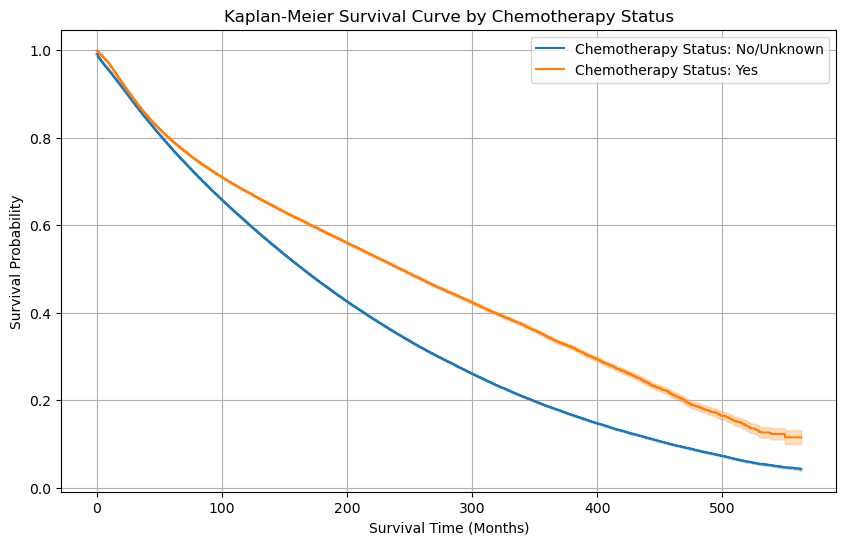

In [41]:
# Plot Kaplan-Meier curve for Chemotherapy Status
plt.figure(figsize=(10, 6))
for chemo_status in data['chemotherapy_status'].unique():
    kmf.fit(data[data['chemotherapy_status'] == chemo_status]['survival_months'],
            event_observed=(data[data['chemotherapy_status'] == chemo_status]['vital_status'] == 'Dead'))  # 'Dead' is the event
    kmf.plot_survival_function(label=f'Chemotherapy Status: {chemo_status}')

plt.title('Kaplan-Meier Survival Curve by Chemotherapy Status')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

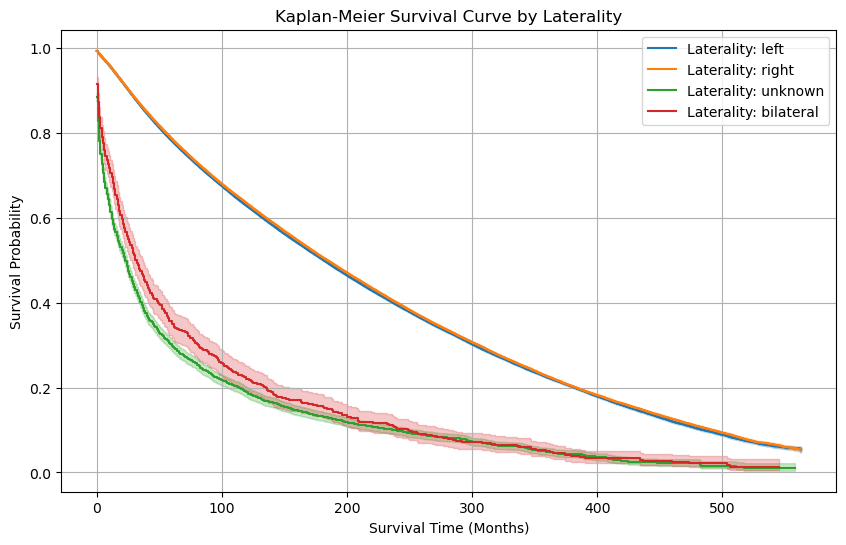

In [42]:
# Plot Kaplan-Meier curve for Laterality
plt.figure(figsize=(10, 6))
for laterality in data['laterality'].unique():
    kmf.fit(data[data['laterality'] == laterality]['survival_months'],
            event_observed=(data[data['laterality'] == laterality]['vital_status'] == 'Dead'))  # 'Dead' is the event
    kmf.plot_survival_function(label=f'Laterality: {laterality}')

plt.title('Kaplan-Meier Survival Curve by Laterality')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
data.diagnosis_to_treatment_days.unique()


array(['Unable to calculate', '011', '000', '001', '004', '020', '078',
       '028', '027', '002', '054', '008', '058', '056', '014', '006',
       '036', '120', '013', '025', '009', '012', '072', '022', '038',
       '018', '031', '034', '007', '016', '029', '021', '039', '035',
       '030', '024', '010', '017', '041', '015', '061', '019', '094',
       '026', '143', '731+ days', '023', '098', '005', '037', '265',
       '080', '003', '046', '052', '033', '055', '135', '321', '048',
       '088', '071', '067', '077', '064', '075', '047', '042', '043',
       '040', '076', '050', '032', '102', '454', '081', '044', '063',
       '053', '059', '051', '159', '083', '065', '131', '239', '168',
       '057', '045', '049', '119', '366', '122', '079', '365', '309',
       '091', '129', '133', '087', '090', '070', '060', '066', '165',
       '062', '199', '475', '708', '073', '139', '216', '084', '069',
       '657', '180', '182', '100', '125', '145', '074', '242', '260',
       '155', '520'